<a href="https://colab.research.google.com/github/ramon-santana-silva/miniprojeto01/blob/main/roofimoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Mini Projeto Roof Imóveis </h1>

<h1>CONTEXTO</h1>
Roof Imóveis é uma das maiores empresas do ramo imobiliário Brasileiro
e quer expandir sua área de atuação fazendo um investimento internacional,
com isso, uma consultoria estratégica permitirá investir em imóveis no Condado de County, nos Estados
Unidos.
<h1>OBJETIVO</h1>
Construir um modelo que permite a "Roof Imóveis" identificar os 5 imóveis melhores para investir e quais o 5 imóveis que não deveria investir de forma alguma.

In [48]:
#bibliotecas de manipulação de dados 
#!pip install pandas 
#!pip install numpy
#!pip install seaborn
#!pip install matplotlib
#!pip install sidetable
!pip install -U scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
#importação das bibliotecas
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sidetable as stb
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error

O Dataset apresenta a venda de imóveis e suas características na região
de Maio de 2014 à Maio de 2015. Tem um total de 21613 registros com um total
de 21 atributos.

<h2>Extração/ Obtenção de dados</h2>
As bases de dados foram retiradas do site: https://www.kaggle.com/harlfoxem/housesalesprediction e https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/ e dataset extraidos do repositorio Github :'https://raw.githubusercontent.com/ramon-santana-silva/pythonCaseDNC/main/kc_house_data.csv' e 'https://raw.githubusercontent.com/ramon-santana-silva/pythonCaseDNC/main/Zipcodes_for_King_County_and_Surrounding_Area_(Shorelines)___zipcode_shore_area.csv'

In [5]:
#extraindo dataframe
DATA_URL ='https://raw.githubusercontent.com/ramon-santana-silva/pythonCaseDNC/main/kc_house_data.csv'     
#convertendo objeto para data parse_dates
roof_df= pd.read_csv(DATA_URL,sep=',',parse_dates=["date"])


<h1>Informação das colunas do dataframe roof_df</h1>
                             

*   id - Identiﬁcador único do imóvel 
*   view - Grau de quão belo é a vista do imóvel (0 a 4)
*   date - Data da Venda
*   condition - Condição da casa (1 a 5)
*   price - Preço de venda
*   grade - Classiﬁcação por qualidade de material utilizado na
construção
*   bedrooms - Nº de Quartos
*   bathrooms - Nº de Banheiros 
*   sqft_above - Área em acima do solo em ft²
*   sqft_liv - Tamanho de área habitável em ft²sqft_basmtÁrea em abaixo do solo em ft²
*   sqft_lot - Tamanho do terreno em ft²
*   yr_built - Ano de construção
*   ﬂoors - Número de andares
*   yr_renov - Ano de restauração, caso o contrário, 0.
*   zipcode - Zip Code 5 - Similar ao CEP
*   waterfront - Indicativo se o imóvel é a beira-mar
*   lat - Latitude
*   long - Longitude
*   squft_liv15 - Média da área habitável dos 15 imóveis mais próximos,
em ft²
*   squft_lot15 - Média da área do lote dos 15 imóveis mais próximos,
em ft²













In [6]:
#extraindo dataframe zipcode_df
DATA_URL2='https://raw.githubusercontent.com/ramon-santana-silva/pythonCaseDNC/main/Zipcodes_for_King_County_and_Surrounding_Area_(Shorelines)___zipcode_shore_area.csv'
zipcode_df=pd.read_csv(DATA_URL2 , sep=",", encoding='UTF-8')



<h1>Informação das colunas do dataframe zipcode_df</h1>

*  OBJECTID -	Código ID
*  zipcode - Zip Code 5 - Similar ao CEP
*  COUNTY - Código do municipio
*  COUNTY	County code
*  ZIP_TYPE -	tipo de zipcode: padrão ou caixa postal
*  Shape_Leng -	comprimento poligonal
*  Shape_Area -	aréa poligonal








<h2>Limpeza dos Dataframes roof_df e zipcode_df </h2>
Para uma analise mais clara e objetiva serão excluidas algumas colunas que não são necessarias nesse modelo de previsão de dados


*   Tipo de colunas como:
1.   Dados repedidos ou similares
2.   Ids desnecessarios
3.   Tipo de zipcode

*   Filtrar por informações  alvo do projeto








In [7]:
#zipcode_df sendo reduzido atraves da criação de novo dataframe somente com o municipio de King County alvo do projeto
zipKingCounty_df= zipcode_df[(zipcode_df.COUNTY == 33)]
zipKingCounty_df

,OBJECTID,ZIP,ZIPCODE,COUNTY,ZIP_TYPE,COUNTY_NAME,PREFERRED_CITY,Shape_Length,Shape_Area
0,1,98001,98001,33,Standard,King County,AUBURN,148134.771476,5.261214e+08
1,2,98002,98002,33,Standard,King County,AUBURN,105168.476823,2.044452e+08
2,3,98003,98003,33,Standard,King County,FEDERAL WAY,121645.069928,3.169812e+08
3,4,98004,98004,33,Standard,King County,BELLEVUE,108801.063326,2.014512e+08
4,5,98005,98005,33,Standard,King County,BELLEVUE,116930.354131,2.112733e+08
...,...,...,...,...,...,...,...,...,...
100,101,98199,98199,33,Standard,King County,SEATTLE,56408.722420,1.132192e+08
108,109,98224,98224,33,PO Box,King County,BARING,187335.039773,1.720745e+09
118,119,98288,98288,33,PO Box,King County,SKYKOMISH,484891.351634,8.749464e+09
147,148,98354,98354,33,Standard,King County,MILTON,25310.379574,1.500487e+07


In [ ]:
#identificando valores únicos do dataframe zipKingCounty_df
zipKingCounty_df.nunique()

In [ ]:
# Verificando o cabeçalho
roof_df.head()

In [ ]:
# Verificando informações do dataset
roof_df.info()

In [ ]:
zipcode_df.info()

In [ ]:
# Verificando quantos dados nulos há
roof_df.isnull().sum()

In [ ]:
#verificando quantos dados nulos há
zipcode_df.isnull().sum()

In [9]:
#unindo os datasets roof_df e zipcode_df
df=pd.merge(roof_df, zipcode_df, left_on='zipcode', right_on='ZIPCODE', how='left').drop('ZIPCODE',axis=1).drop('COUNTY',axis=1).drop('ZIP_TYPE',axis=1).drop('COUNTY_NAME',axis=1)  
df.head(5)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,PREFERRED_CITY,Shape_Length,Shape_Area
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,97,98178,SEATTLE,67151.963868,1.353411e+08
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,81,98125,SEATTLE,66923.859716,1.496818e+08
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,24,98028,KENMORE,75146.222022,1.732332e+08
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,85,98136,SEATTLE,52855.048472,6.318620e+07
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,56,98074,SAMMAMISH,115554.667658,3.277498e+08


In [ ]:
#identificando valores únicos do dataframe df
df.nunique()

In [10]:
#removendo coluna zip pois no zipcode tem as mesmas informações
df.drop('ZIP', axis=1, inplace=True)


In [11]:
#removendo coluna id
df.drop('id', axis=1, inplace=True)

In [12]:
#funções para ajustar data
df['month']=df['date'].apply(lambda date:date.month)
df['year']= df['date'].apply(lambda date:date.year)
#sns.boxplot(x='year', y='price', data=df);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23309 entries, 0 to 23308
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            23309 non-null  datetime64[ns]
 1   price           23309 non-null  float64       
 2   bedrooms        23309 non-null  int64         
 3   bathrooms       23309 non-null  float64       
 4   sqft_living     23309 non-null  int64         
 5   sqft_lot        23309 non-null  int64         
 6   floors          23309 non-null  float64       
 7   waterfront      23309 non-null  int64         
 8   view            23309 non-null  int64         
 9   condition       23309 non-null  int64         
 10  grade           23309 non-null  int64         
 11  sqft_above      23309 non-null  int64         
 12  sqft_basement   23309 non-null  int64         
 13  yr_built        23309 non-null  int64         
 14  yr_renovated    23309 non-null  int64         
 15  zi

In [ ]:
display(df)

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,23309.0,5.364409e+05,3.611988e+05,75000.000000,3.225000e+05,4.500000e+05,6.390000e+05,7.700000e+06
bedrooms,23309.0,3.375306e+00,9.199285e-01,0.000000,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,23309.0,2.121713e+00,7.642047e-01,0.000000,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,23309.0,2.094036e+03,9.186376e+02,290.000000,1.440000e+03,1.930000e+03,2.570000e+03,1.354000e+04
sqft_lot,23309.0,1.661673e+04,4.535101e+04,520.000000,5.137000e+03,7.760000e+03,1.111900e+04,1.651359e+06
floors,23309.0,1.494745e+00,5.367723e-01,1.000000,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,23309.0,7.035909e-03,8.358651e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,23309.0,2.360033e-01,7.698170e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,23309.0,3.406195e+00,6.470400e-01,1.000000,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,23309.0,7.672487e+00,1.176317e+00,1.000000,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01


<h1>Colunas importantes para Analise dos Dados</h1>


In [14]:
#referência da coluna 'price' para de forma resumida e organizada seja obtido as medidas de tendência central como media, mediana e moda.
pd.DataFrame(df['price'].describe())


,price
count,2.330900e+04
mean,5.364409e+05
std,3.611988e+05
min,7.500000e+04
25%,3.225000e+05
50%,4.500000e+05
75%,6.390000e+05
max,7.700000e+06


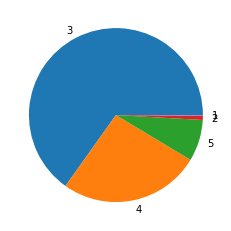

In [15]:
#obtendo informações de frequencia absoluta e relativa das condições do imóveis entre 1 a 5. sendo 1 muito ruim e 5 muito bom
df_percent_condition=df.stb.freq(['condition'])
plt.pie(x=df_percent_condition['percent'],labels=df_percent_condition.condition);


<h1>Analise Exploratória </h1>


*   Observar caracteristicas por caracteristicas das colunas:
1.   Utilizar a analise qualitativa Quantil para eliminar Outliers
*   analisar valores númericos discretos(bedrooms,bathrooms	sqft_living,sqft_lot,floors)



<h3>Grafico de heatmap</h3>
Permite analise de correlação em que:<br>


*   0.7 a 0.9 positivo ou negativo indica uma correlação forte.
*   0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
*   0.3 a 0.5 positivo ou negativo indica uma correlação fraca




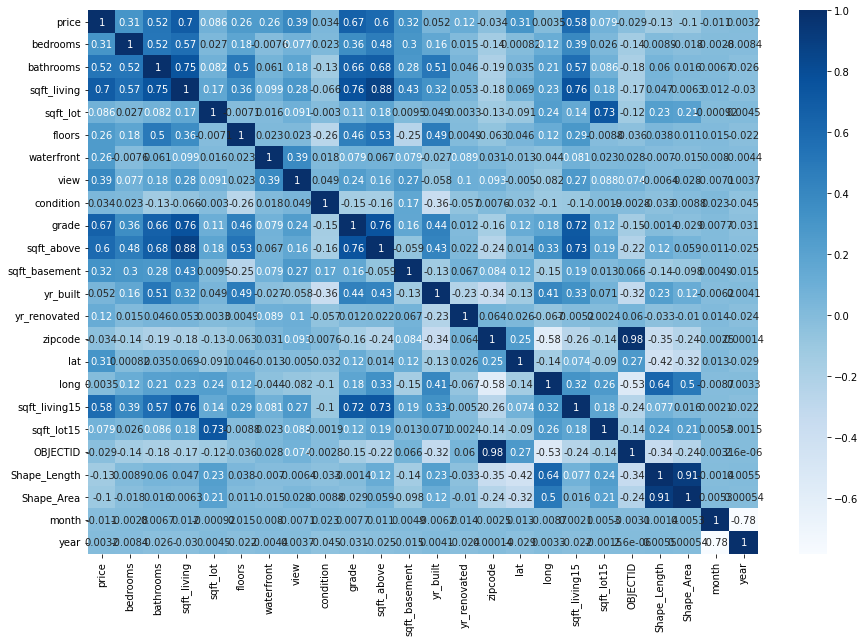

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues');

In [22]:
#funções para definição de Analise de outliers
columns=df
def limites(columns):
  q1=columns.quantile(.25)
  q3=columns.quantile(.75)
  amplitude= q3-q1
  return q1-1.5*amplitude, q3+1.5*amplitude
def diagrama_caixa(columns):
  fig,(ax1, ax2)= plt.subplots(1,2)
  fig.set_size_inches(15,5)
  sns.boxplot(x=columns, ax=ax1)
  ax2.set_xlim(limites(columns))
  sns.boxplot(x=columns, ax=ax2)
def histograma(columns):
  plt.figure(figsize=(15,5))
  sns.distplot(columns, hist=True)
def grafico_barra(columns):
  plt.figure(figsize=(15,5))
  ax=sns.barplot(x=columns.value_counts().index,y=columns.value_counts())
  ax.set_xlim(limites(columns))
def grafico_barra2(columns,columns2):
  plt.figure(figsize=(20,25))
  plt.xticks(rotation=75, fontsize=20)
  ax=sns.barplot(x=columns,y=columns2)
def grafico_caixa(column,column2):
  plt.figure(figsize=[12, 6])
  plt.subplot(122)
  plt.xticks(rotation=75, fontsize=10)
  sns.boxplot(x=column, y=column2, data=df)
  plt.show()

<h1>Price</h1>

In [ ]:
df.sort_values('price',ascending=False).head(5)

In [ ]:
diagrama_caixa(df['price'])
histograma(df['price'])

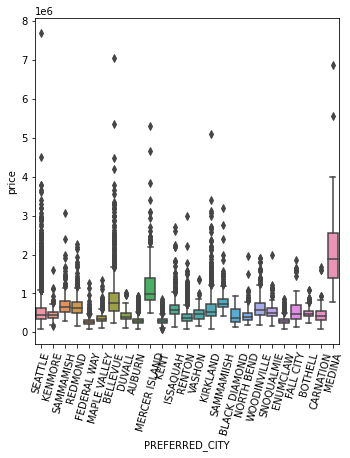

In [24]:
grafico_caixa('PREFERRED_CITY','price')

In [34]:
df_areaprice=df['Shape_Area'],df['price']('price',ascending=False).head(5)
df_areaprice

(0        1.353411e+08
 1        1.496818e+08
 2        1.732332e+08
 3        6.318620e+07
 4        3.277498e+08
              ...     
 23304    1.439973e+08
 23305    1.264362e+08
 23306    9.249711e+07
 23307    1.588700e+09
 23308    9.249711e+07
 Name: Shape_Area, Length: 23309, dtype: float64, 0        221900.0
 1        538000.0
 2        180000.0
 3        604000.0
 4        510000.0
            ...   
 23304    360000.0
 23305    400000.0
 23306    402101.0
 23307    400000.0
 23308    325000.0
 Name: price, Length: 23309, dtype: float64)

<h1>Grade</h1>
Classiﬁcação por qualidade de material utilizado na construção

In [46]:
df['grade']

0        7
1        7
2        6
3        7
4        8
        ..
23304    8
23305    8
23306    7
23307    8
23308    7
Name: grade, Length: 23309, dtype: int64

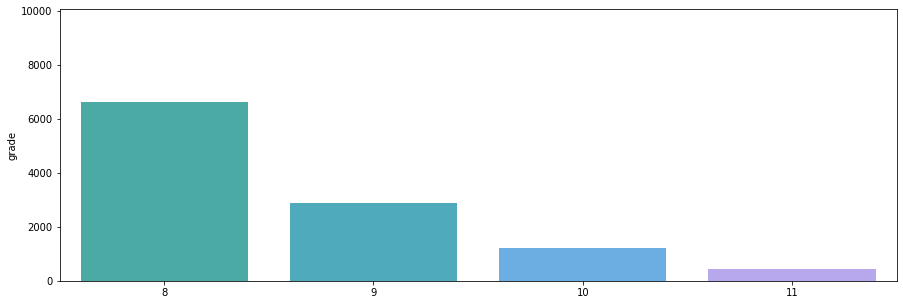

In [47]:
grafico_barra(df['grade'])

<h1>Bedrooms</h1>


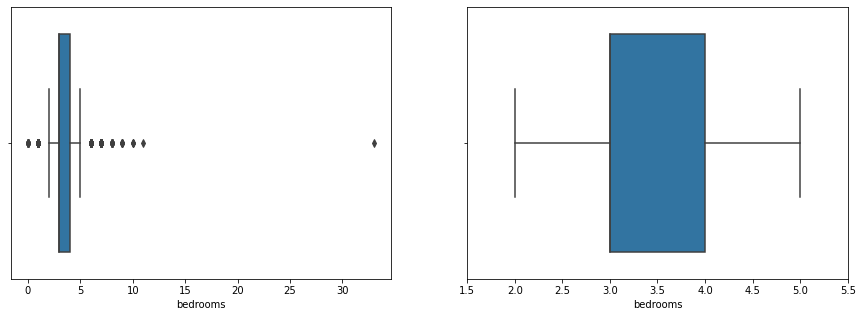

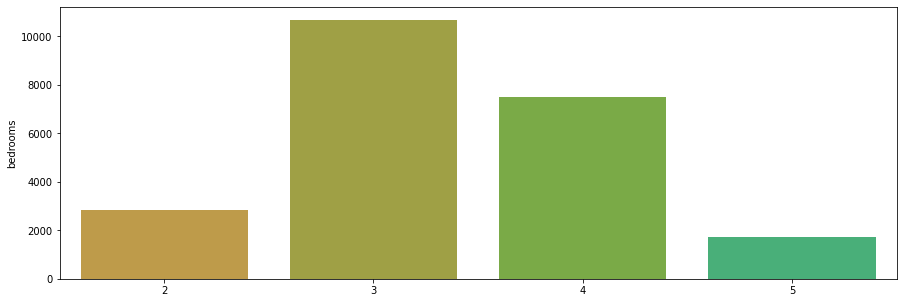

In [ ]:
diagrama_caixa(df['bedrooms'])
grafico_barra(df['bedrooms'])

<h2>Visualização  do mapa</h2>





In [ ]:
df['lat'].max()

47.7776

In [ ]:
long_max=df['long'].max()

In [ ]:
df['OBJECTID']

0        97
1        81
2        24
3        85
4        56
         ..
23304    65
23305    87
23306    86
23307    23
23308    86
Name: OBJECTID, Length: 23309, dtype: int64

In [ ]:
#amostra do mapa  
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="long",
    hover_name="OBJECTID",
    hover_data=["PREFERRED_CITY", "price"],
    color_discrete_sequence=["fuchsia"],
    zoom=3,
    height=300,)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(mapbox_bounds={"west": -180, "east": -50, "south": 20, "north": 90})
fig.show()

<h1>Modelo de previsão para saber quais os 5 imoveis se deve investir</h1>
*   problema de regressão
1.   Metrica R²- variacia dos dados
2.   RSME (Raiz do erro quadrático Médio)
*   Regressão Linear
*   Modelo de árvore de decisão







In [ ]:
#dados de treino


In [ ]:
#encontrar a cidade do imovel
df['PREFERRED_CITY'].value_counts()


SEATTLE          9232
RENTON           1597
BELLEVUE         1407
AUBURN           1263
KENT             1203
REDMOND           979
KIRKLAND          977
WOODINVILLE       942
FEDERAL WAY       779
ISSAQUAH          733
MAPLE VALLEY      590
ENUMCLAW          468
SAMMAMISH         441
BOTHELL           390
DUVALL            380
SAMMAMIISH        359
SNOQUALMIE        310
KENMORE           283
MERCER ISLAND     282
NORTH BEND        221
CARNATION         124
VASHON            118
BLACK DIAMOND     100
FALL CITY          81
MEDINA             50
Name: PREFERRED_CITY, dtype: int64

In [ ]:
df['zipcode'].value_counts()